<a href="https://colab.research.google.com/github/id-shiv/project_notebooks/blob/master/%5BProject_003%5D_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

Dataset : collection of weather metrics

In [0]:
csv_path = 'https://query.data.world/s/af43swnwx5mouyz4pogqazlgk6jhyt'
data = pd.read_csv(csv_path)
data.head()

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,1/1/2011,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,1/1/2011,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,1/1/2011,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,1/1/2011,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,1/1/2011,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


# Clean Data

Check the data shape before cleaning

In [0]:
data.shape

(17379, 14)

Check NaN rows and drop if any

In [0]:
nan_rows = data[pd.isnull(data).any(axis=1)]
data.dropna(how='any')
data.shape

(17379, 14)

# Augment Data

Enhance the data by adding information

Add Month and Year column

In [0]:
def get_month(date):
  return date.split('/')[0]

def get_year(date):
  return date.split('/')[2]

data['Month'] = data['Date'].apply(lambda x: get_month(x))
data['Year'] = data['Date'].apply(lambda x: get_year(x))
data.tail()

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users,Month,Year
17374,12/31/2012,4,19,0,1,1,2,38.3,33.8,60,11,11,108,119,12,2012
17375,12/31/2012,4,20,0,1,1,2,38.3,33.8,60,11,8,81,89,12,2012
17376,12/31/2012,4,21,0,1,1,1,38.3,33.8,60,11,7,83,90,12,2012
17377,12/31/2012,4,22,0,1,1,1,38.3,35.6,56,9,13,48,61,12,2012
17378,12/31/2012,4,23,0,1,1,1,38.3,35.6,65,9,12,37,49,12,2012


# Analyze Data

## Q1 Which month has maximum causual users?

In [0]:
results = data.groupby('Month').sum()

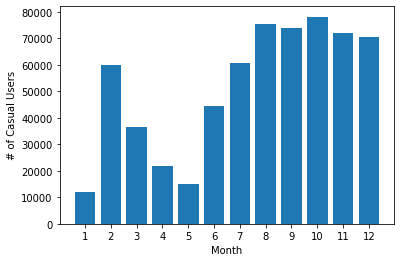

In [0]:
plt.bar(months, results['Casual Users']) # plot months vs casual users
months = range(1, 13)
plt.xticks(months) # set the X-axis range

# Label axis
plt.xlabel('Month')
plt.ylabel('# of Casual Users')

plt.show()

## Q2 Which Season?

In [0]:
seasons = [season for season, _ in data.groupby('Season')]

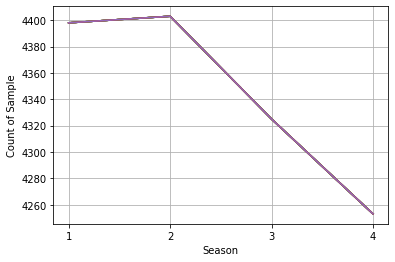

In [0]:
plt.plot(seasons, data.groupby('Season').count()) #
plt.xticks(seasons) # set the X-axis range

# Label axis
plt.xlabel('Season')
plt.ylabel('Count of Sample')

plt.grid()
plt.show()